In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_AE_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102,1.80,NaN,0.43,1.41,NaN,0.70,NaN,750.0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	1
float64		column 2	0
float64		column 3	0
float64		column 4	0
int64		column 5	0
float64		column 6	4
float64		column 7	1
float64		column 8	0
float64		column 9	2
float64		column 10	1
float64		column 11	1
float64		column 12	4
float64		column 13	1


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,177.000000,178.000000,178.000000,178.000000,178.000000,174.000000,177.000000,178.000000,176.000000,177.000000,177.000000,174.000000,177.000000
mean,12.994633,2.336348,2.366517,19.494944,99.741573,2.290287,2.036497,0.361854,1.587727,5.045424,0.958960,2.619195,743.796610
std,0.810182,1.117146,0.274344,3.339564,14.282484,0.627919,0.997014,0.124453,0.573164,2.318678,0.228327,0.707623,313.071211
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.360000,1.602500,2.210000,17.200000,88.000000,1.742500,1.220000,0.270000,1.247500,3.210000,0.790000,1.970000,500.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.335000,2.140000,0.340000,1.555000,4.680000,0.970000,2.780000,672.000000
75%,13.670000,3.082500,2.557500,21.500000,107.000000,2.800000,2.880000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

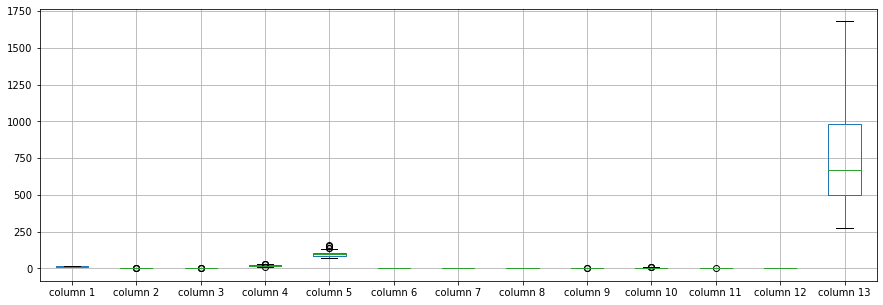

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      12.994633
column 2       2.336348
column 3       2.366517
column 4      19.494944
column 5      99.741573
column 6       2.290287
column 7       2.036497
column 8       0.361854
column 9       1.587727
column 10      5.045424
column 11      0.958960
column 12      2.619195
column 13    743.796610
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.096107,0.206426,-0.307801,0.262687,0.294904,0.239469,-0.153661,0.142436,0.548145,-0.080546,0.073776,0.639416
column 2,0.096107,1.000000,0.164045,0.288500,-0.054575,-0.323641,-0.404926,0.292977,-0.213757,0.243264,-0.569152,-0.350436,-0.192036
column 3,0.206426,0.164045,1.000000,0.443367,0.286587,0.151743,0.118699,0.186230,0.027973,0.257424,-0.076837,0.026815,0.217209
column 4,-0.307801,0.288500,0.443367,1.000000,-0.083333,-0.313709,-0.346431,0.361922,-0.189170,0.013041,-0.271298,-0.261162,-0.439180
column 5,0.262687,-0.054575,0.286587,-0.083333,1.000000,0.233733,0.197873,-0.256294,0.250993,0.199626,0.049324,0.084630,0.384360
column 6,0.294904,-0.323641,0.151743,-0.313709,0.233733,1.000000,0.862252,-0.446792,0.612420,-0.037667,0.436600,0.695998,0.514063
column 7,0.239469,-0.404926,0.118699,-0.346431,0.197873,0.862252,1.000000,-0.536878,0.651884,-0.166561,0.551406,0.783411,0.496483
column 8,-0.153661,0.292977,0.186230,0.361922,-0.256294,-0.446792,-0.536878,1.000000,-0.362097,0.136528,-0.262196,-0.499958,-0.310097
column 9,0.142436,-0.213757,0.027973,-0.189170,0.250993,0.612420,0.651884,-0.362097,1.000000,-0.021697,0.295302,0.518624,0.346755
column 10,0.548145,0.243264,0.257424,0.013041,0.199626,-0.037667,-0.166561,0.136528,-0.021697,1.000000,-0.524501,-0.414199,0.319632


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+44,13+44+44,13+44+44,13+44+44+44+44,13+44+44+44+44+44,13+44+44+44+44+44+44,13+44+44+44+44+44,13+44+44+44+44,13+44+44+44,13+44+44,13+44,13], vae_layer = False, seed = 440)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 953.4098621715199
Epoch: 1 , loss: 954.9327947443181
Epoch: 2 , loss: 953.4189675071023
Epoch: 3 , loss: 954.409950949929
Epoch: 4 , loss: 950.765907981179
Epoch: 5 , loss: 954.9221690784801
Epoch: 6 , loss: 949.5660178444602
Epoch: 7 , loss: 949.8759599165483
Epoch: 8 , loss: 952.183144309304
Epoch: 9 , loss: 951.7183948863636
Epoch: 10 , loss: 951.6349931196733
Epoch: 11 , loss: 950.3383511629971
Epoch: 12 , loss: 948.5542547052556
Epoch: 13 , loss: 945.043251731179
Epoch: 14 , loss: 949.2601429332386
Epoch: 15 , loss: 955.0770763050426
Epoch: 16 , loss: 944.2835582386364
Epoch: 17 , loss: 955.5625166459517
Epoch: 18 , loss: 950.1748046875
Epoch: 19 , loss: 947.325517134233
Epoch: 20 , loss: 953.5515636097301
Epoch: 21 , loss: 946.2814774946733
Epoch: 22 , loss: 948.9779996004971
Epoch: 23 , loss: 949.8480834960938
Epoch: 24 , loss: 956.3002430308949
Epoch: 25 , loss: 952.6941195401279
Epoch: 26 , lo

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.93
column 2       3.80
column 3       2.65
column 4      18.60
column 5     102.00
column 6       2.41
column 7       2.41
column 8       0.25
column 9       1.98
column 10      4.50
column 11      1.03
column 12      3.52
column 13    770.00
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0
1,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0
2,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0
3,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0
4,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0
174,0.0,0.0,0.0,0.0,0,0.0,-0.727215,0.0,0.0,-7.276513,0.0,-1.53662,0.0
175,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0
176,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1295.093741586634, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.11883689379403986

In [18]:
new_df.iloc[66,:]

column 1      13.110000
column 2       1.010000
column 3       1.700000
column 4      15.000000
column 5      78.000000
column 6       0.020491
column 7       3.180000
column 8       0.260000
column 9       0.020569
column 10      5.300000
column 11      1.120000
column 12      0.020648
column 13    502.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127,2.80,3.060000,0.28,2.29,5.640000,1.04,3.92000,1065.0
1,13.20,1.78,2.14,11.2,100,2.65,2.760000,0.26,1.28,4.380000,1.05,3.40000,1050.0
2,13.16,2.36,2.67,18.6,101,2.80,3.240000,0.30,2.81,5.680000,1.03,3.17000,1185.0
3,14.37,1.95,2.50,16.8,113,3.85,3.490000,0.24,2.18,7.800000,0.86,3.45000,1480.0
4,13.24,2.59,2.87,21.0,118,2.80,2.690000,0.39,1.82,4.320000,1.04,2.93000,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.610000,0.52,1.06,7.700000,0.64,1.74000,740.0
174,13.40,3.91,2.48,23.0,102,1.80,0.022785,0.43,1.41,0.023487,0.70,0.02338,750.0
175,13.27,4.28,2.26,20.0,120,1.59,0.690000,0.43,1.35,10.200000,0.59,1.56000,835.0
176,13.17,2.59,2.37,20.0,120,1.65,0.680000,0.53,1.46,9.300000,0.60,1.62000,840.0


In [20]:
imputations[-1].to_excel("Wine_AE_1(imp).xlsx", index=False, header=False)